(24000, 28, 28)
tag:  0 
 index: 3
tag:  1 
 index: 5
tag:  2 
 index: 9
tag:  3 
 index: 1
tag:  4 
 index: 0
new size of data: (24000, 784)


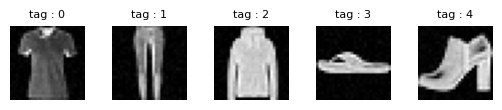

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as mt


## שאלה 1
# א: 
with open('TrainData.pkl', 'rb') as file:
    train_data = pickle.load(file)

with open('TestData.pkl', 'rb') as test_file:
    test_data = pickle.load(test_file)

y_actual = train_data['Y']
matrix = train_data['X'].T
test_matrix = test_data['X'].T
y_actual_test = test_data['Y']
new_shape_test_data = test_matrix.reshape(6000,784) 
print(matrix.shape)
#ב: 
counter = 0
for i in range(5):
    while y_actual[counter] != i:
        counter += 1
    print('tag: ', y_actual[counter],'\n','index:',counter)
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(matrix[counter].T, cmap='gray')
    plt.title(f'tag : {i}',size= 8)
    plt.tight_layout(pad=2)
    counter = 0    


#ג: 
new_shape_data = matrix.reshape(24000, 784)
print(f'new size of data: {new_shape_data.shape}')





# סיווג לפי מספר 
sum_arr = np.zeros(5)
count_arr = np.zeros(5)
for i in range(24000):
        sum_arr[y_actual[i]] += 1
    


#הפרדת הדאטה
my_data = {
    0: np.zeros((int(sum_arr[0]), 784)),
    1: np.zeros((int(sum_arr[1]), 784)),
    2: np.zeros((int(sum_arr[2]), 784)),
    3: np.zeros((int(sum_arr[3]), 784)),
    4: np.zeros((int(sum_arr[4]), 784)),
}


for i in range(24000):
    my_data[y_actual[i]][int(count_arr[y_actual[i]])] = new_shape_data[i]
    count_arr[y_actual[i]] += 1


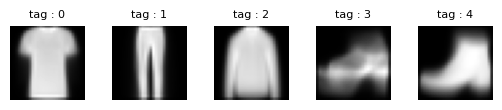

In [14]:
## שאלה 2
class_prior = {
0: sum_arr[0]/24000,
1: sum_arr[1]/24000,
2: sum_arr[2]/24000,
3: sum_arr[3]/24000,
4: sum_arr[4]/24000,
}

#יצירת וקטור ממוצעים
avg_matrix = np.zeros((5, 784))
for i in range(5):
    avg_matrix[i] = np.average(my_data[i], axis=0)
    
    

# יצירת וקטור שוניות
var_matrix = np.zeros((5, 784))
for i in range(5):
    var_matrix[i] = (np.var(my_data[i], axis=0))
  




def gaussian_func(x, mu, sigma):
    sigma = np.where(sigma == 0, 1e-9, sigma)
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))


def predict(vector, means, variances, class_priors):
    posteriors = np.zeros(5)
    for i in range(5):
        prior = np.log(class_priors[i])
        std_devs = np.sqrt(variances[i])
        likelihood = np.sum(np.log(gaussian_func(vector, means[i], std_devs)))
        posteriors[i] = prior + likelihood
    return  (np.argmax(posteriors))



as_picture_avg_matrix = avg_matrix.reshape(5,28,28)

for i in range(5):
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.imshow(as_picture_avg_matrix[i].T, cmap='gray')
    plt.title(f'tag : {i}',size= 8)
    plt.tight_layout(pad=2)
    counter = 0    





    

In [15]:
#שאלה 3

# יצירת מטריצת ערבול
confusion_matrix = np.zeros((5, 5))
correct_predictions = 0

for i in range(24000):
    predicted_label = predict(new_shape_data[i], avg_matrix, var_matrix, class_prior)
    actual_label = y_actual[i]
    
    # עדכון המטריצה
    confusion_matrix[actual_label][predicted_label] += 1
    
    # בדיקה עבור הצפייה לבין הערך שהתקבל
    if predicted_label == actual_label:
        correct_predictions += 1
#חישוב דיוק המסווג
accuracy = correct_predictions / 24000
np.set_printoptions(suppress =True)
print(f'The accuracy is: {accuracy * 100:.2f}%')
print('Confusion matrix:')
print(confusion_matrix)


C:\Users\User\AppData\Local\Temp\ipykernel_12948\544184721.py:36: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(gaussian_func(vector, means[i], std_devs)))


The accuracy is: 91.10%
Confusion matrix:
[[4151.  484.  150.    8.    0.]
 [ 158. 4630.   42.    0.    0.]
 [ 164.  353. 4303.    4.    0.]
 [  22.    5.    4. 4522.  219.]
 [  11.    1.    4.  507. 4258.]]


In [16]:
#שאלה 4

confusion_matrix = np.zeros((5, 5))
correct_predictions = 0


for i in range(6000):
    predicted_label = predict(new_shape_test_data[i], avg_matrix, var_matrix, class_prior)
    actual_label = y_actual_test[i]
    
  
    confusion_matrix[actual_label][predicted_label] += 1
    
  
    if predicted_label == actual_label:
        correct_predictions += 1


accuracy = correct_predictions / 6000
np.set_printoptions(suppress =True)
print(f'The accuracy is: {accuracy * 100:.2f}%')
print('Confusion matrix:')
print(confusion_matrix)



C:\Users\User\AppData\Local\Temp\ipykernel_12948\544184721.py:36: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(gaussian_func(vector, means[i], std_devs)))


The accuracy is: 90.43%
Confusion matrix:
[[1042.  120.   45.    0.    0.]
 [  42. 1118.   10.    0.    0.]
 [  50.   91. 1034.    1.    0.]
 [   3.    1.    1. 1155.   68.]
 [   5.    1.    1.  135. 1077.]]
